In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df  = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


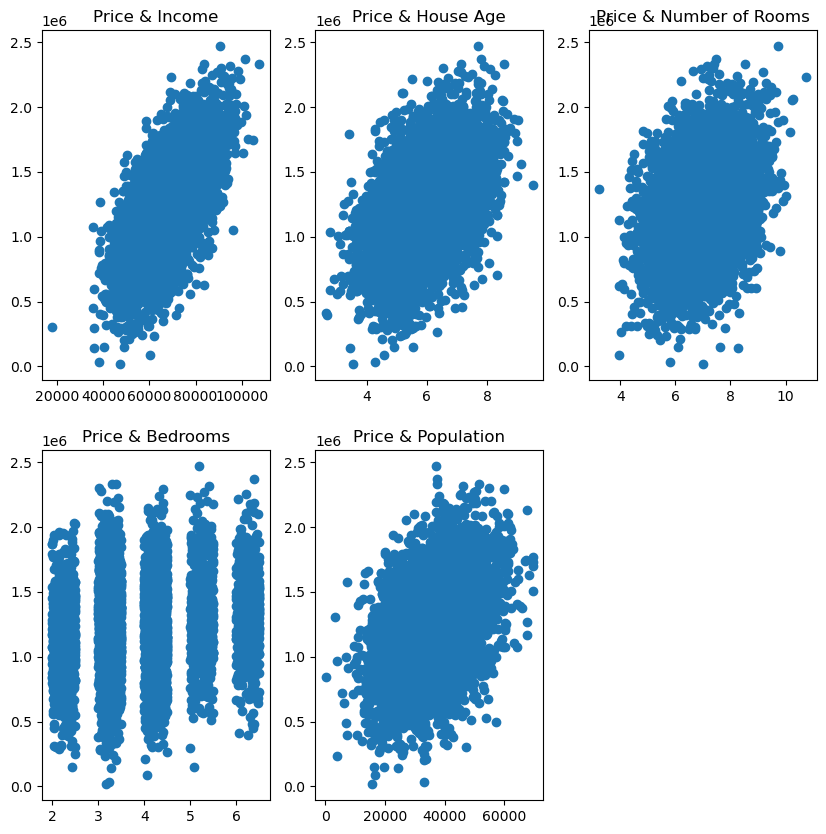

In [5]:
fig = plt.figure(figsize=(10, 10))
fig1 = plt.subplot(231)
plt.scatter(df.loc[:, 'Avg. Area Income'], df.loc[:, 'Price'])
plt.title('Price & Income')

fig2 = plt.subplot(232)
plt.scatter(df.loc[:, 'Avg. Area House Age'], df.loc[:, 'Price'])
plt.title('Price & House Age')

fig1 = plt.subplot(233)
plt.scatter(df.loc[:, 'Avg. Area Number of Rooms'], df.loc[:, 'Price'])
plt.title('Price & Number of Rooms')

fig1 = plt.subplot(234)
plt.scatter(df.loc[:, 'Avg. Area Number of Bedrooms'], df.loc[:, 'Price'])
plt.title('Price & Bedrooms')

fig1 = plt.subplot(235)
plt.scatter(df.loc[:, 'Area Population'], df.loc[:, 'Price'])
plt.title('Price & Population')

plt.show()

In [6]:
X = df.loc[:, 'Avg. Area Income']
y = df.loc[:, 'Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [8]:
X = np.array(X).reshape(-1,1)
print(X.shape)

(5000, 1)


In [10]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()

#train the model
LR1.fit(X, y)

LinearRegression()

In [11]:
y_predict_1 = LR1.predict(X)
print(y_predict_1)

[1464424.9504096  1458133.78934377 1077429.52283635 ... 1122016.75893299
 1219741.59365632 1166948.95599714]


In [12]:
#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error1 = mean_squared_error(y, y_predict_1)
r2_score_1 = r2_score(y, y_predict_1)

In [13]:
print(mean_squared_error1, r2_score_1)

73645940735.18942 0.4092593070338846


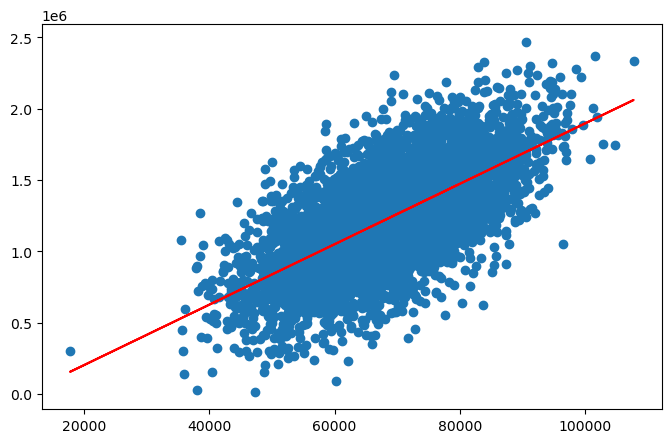

In [15]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.plot(X, y_predict_1, 'r')
plt.show()

In [22]:
#define X_multi
X_muti = df.drop(['Price', 'Address'], axis=1)
X_muti.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [19]:
# X_mutiX = np.array(X_muti).reshape(1,-1)
# print(X_muti.shape)

(5000, 6)


In [25]:
LR_mul = LinearRegression()
LR_mul.fit(X_muti, y)

LinearRegression()

In [26]:
y_predict_mul = LR_mul.predict(X_muti)

In [27]:
mean_squared_error_mul = mean_squared_error(y, y_predict_mul)
r2_score_mul = r2_score(y, y_predict_mul)
print(mean_squared_error_mul, r2_score_mul)

10219734313.253004 0.9180238195089554


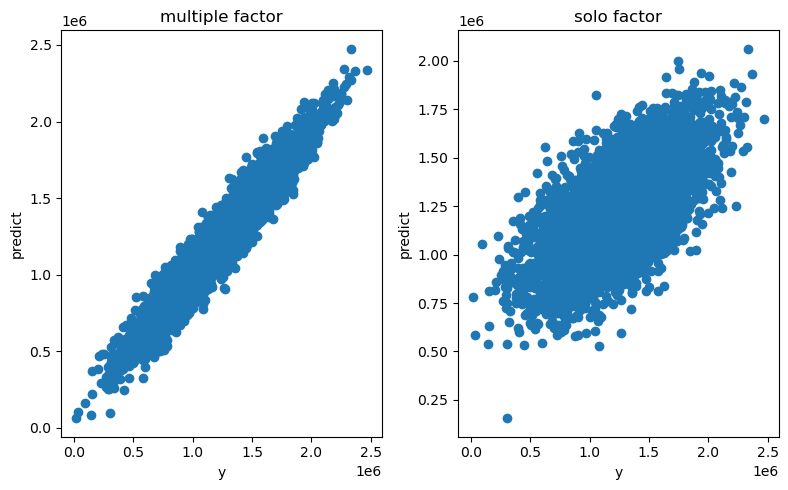

In [35]:
fig7 = plt.figure(figsize=(8,5))
plt.subplot(121)
plt.title('multiple factor')
plt.xlabel('y')
plt.ylabel('predict')
plt.scatter(y, y_predict_mul)

plt.subplot(122)
plt.scatter(y, y_predict_1)
plt.title('solo factor')
plt.xlabel('y')
plt.ylabel('predict')

#调整间距
fig7.tight_layout()
plt.show()